# CID analysis 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pylab import *

In [4]:
# Import normalized contact matrix
DR = np.loadtxt('../data/MAT_scn_wt.txt')
UV = np.loadtxt('../data/MAT_scn_uv.txt')
dr = np.loadtxt('../data/MAT_scn_ebfC.txt')

In [6]:
import sys
sys.path.append("../python_codes/")
from directional_indice import *

wt_chr1 = DR[:530,:530]
wt_chr2 = DR[530:613,530:613]
UV_chr1 = UV[:530,:530]
UV_chr2 = UV[530:613,530:613]
ebfC_chr1 = dr[:530,:530]
ebfC_chr2 = dr[530:613,530:613]

scale = 20
DI20_wt = directional(wt_chr1,scale)
DI20_uv = directional(UV_chr1,scale)
DI20_dr = directional(ebfC_chr1,scale)

Size of the matrix entetered for the directional index:
530
Size of the matrix entetered for the directional index:
530
Size of the matrix entetered for the directional index:
530


## chrI 

In [7]:
def CID_identify(borders, thr):
    CID = []
    for i in borders:
        if i >= thr:
            CID.append(thr)
        if i <= -thr:
            CID.append(-thr)
        if i < thr and i > -thr:
            CID.append(i)

    CID_Boundary_count = 0
    CID_Boundary = []
    for i in range(530):     # The BIN number starts from 0 and goes to BIN number 529
        try:
            d = CID.index(thr,i)
            #print(i)
            #print(d)
            if CID[i] == -thr and CID[i+1:d].count(-thr) == 0:
                CID_Boundary_count = CID_Boundary_count + 1
                CID_Boundary.append([i,d])
        except ValueError:
            pass
    return CID_Boundary_count, CID_Boundary

CID_Boundary_count1, CID_Boundary1 = CID_identify(DI20_wt, 2)
print(CID_Boundary_count1)
print(CID_Boundary1)

CID_Boundary_count2, CID_Boundary2 = CID_identify(DI20_uv, 2)
print(CID_Boundary_count2)
print(CID_Boundary2)

CID_Boundary_count3, CID_Boundary3 = CID_identify(DI20_dr, 2)
print(CID_Boundary_count3)
print(CID_Boundary3)

21
[[3, 5], [49, 50], [64, 68], [86, 88], [109, 118], [138, 143], [174, 176], [198, 199], [206, 216], [227, 241], [251, 254], [263, 271], [285, 288], [296, 302], [352, 360], [368, 401], [410, 414], [438, 442], [456, 457], [491, 494], [516, 517]]
15
[[3, 5], [49, 55], [61, 64], [132, 137], [182, 186], [209, 212], [229, 234], [250, 254], [265, 270], [299, 309], [334, 339], [347, 370], [425, 429], [471, 478], [481, 486]]
14
[[3, 4], [23, 25], [47, 51], [60, 67], [87, 89], [109, 116], [137, 145], [260, 277], [364, 371], [385, 394], [409, 426], [445, 448], [470, 478], [490, 494]]


In [8]:
def CID_size(CID_Boundary_count, CID_Boundary):
    CID_BIN = []
    for i in range(CID_Boundary_count):
        if i < CID_Boundary_count-1:
            CID_BIN.append([CID_Boundary[i][1]+1, CID_Boundary[i+1][0]-1])
        else:
            CID_BIN.append([CID_Boundary[i][1]+1, CID_Boundary[0][0]-1])
    
    CID_scale = []
    for j in range(len(CID_BIN)):
        if j < len(CID_BIN)-1:
            scale = (CID_BIN[j][1]-CID_BIN[j][0]+1)*5000
            CID_scale.append(scale)
        if j == len(CID_BIN)-1:
            scale = ((529-CID_BIN[j][0]+1)+(CID_BIN[j][1]+1))*5000
            CID_scale.append(scale)
    return CID_BIN, CID_scale

CID_BIN_wt, CID_scale_wt = CID_size(CID_Boundary_count1, CID_Boundary1)
print(CID_BIN_wt)
#print(CID_scale_wt)
print(max(CID_scale_wt))
print(min(CID_scale_wt))
print(mean(CID_scale_wt))

CID_BIN_UV, CID_scale_UV = CID_size(CID_Boundary_count2, CID_Boundary2)
print(CID_BIN_UV)
print(max(CID_scale_UV))
print(min(CID_scale_UV))
print(mean(CID_scale_UV))

CID_BIN_dr, CID_scale_dr = CID_size(CID_Boundary_count3, CID_Boundary3)
print(CID_BIN_dr)
print(max(CID_scale_dr))
print(min(CID_scale_dr))
print(mean(CID_scale_dr))

[[6, 48], [51, 63], [69, 85], [89, 108], [119, 137], [144, 173], [177, 197], [200, 205], [217, 226], [242, 250], [255, 262], [272, 284], [289, 295], [303, 351], [361, 367], [402, 409], [415, 437], [443, 455], [458, 490], [495, 515], [518, 2]]
245000
30000
91666.66666666667
[[6, 48], [56, 60], [65, 131], [138, 181], [187, 208], [213, 228], [235, 249], [255, 264], [271, 298], [310, 333], [340, 346], [371, 424], [430, 470], [479, 480], [487, 2]]
335000
10000
141333.33333333334
[[5, 22], [26, 46], [52, 59], [68, 86], [90, 108], [117, 136], [146, 259], [278, 363], [372, 384], [395, 408], [427, 444], [449, 469], [479, 489], [495, 2]]
570000
40000
150000.0


## chrII 

In [9]:
scale = 20
DI20_wt_chr2 = directional(wt_chr2,scale)
DI20_uv_chr2 = directional(UV_chr2,scale)
DI20_dr_chr2 = directional(ebfC_chr2,scale)

Size of the matrix entetered for the directional index:
83
Size of the matrix entetered for the directional index:
83
Size of the matrix entetered for the directional index:
83


In [10]:
def CID_identify(borders, thr):
    CID = []
    for i in borders:
        if i >= thr:
            CID.append(thr)
        if i <= -thr:
            CID.append(-thr)
        if i < thr and i > -thr:
            CID.append(i)

    CID_Boundary_count = 0
    CID_Boundary = []
    for i in range(83):     # The BIN number starts from 0 and goes to BIN number 82
        try:
            d = CID.index(thr,i)
            #print(i)
            #print(d)
            if CID[i] == -thr and CID[i+1:d].count(-thr) == 0:
                CID_Boundary_count = CID_Boundary_count + 1
                CID_Boundary.append([i,d])
        except ValueError:
            pass
    return CID_Boundary_count, CID_Boundary

CID_Boundary_count_wt_chr2, CID_Boundary_wt_chr2 = CID_identify(DI20_wt_chr2, 2)
print(CID_Boundary_count_wt_chr2)
print(CID_Boundary_wt_chr2)

CID_Boundary_count_uv_chr2, CID_Boundary_uv_chr2 = CID_identify(DI20_uv_chr2, 2)
print(CID_Boundary_count_uv_chr2)
print(CID_Boundary_uv_chr2)

CID_Boundary_count_dr_chr2, CID_Boundary_dr_chr2 = CID_identify(DI20_dr_chr2, 2)
print(CID_Boundary_count_dr_chr2)
print(CID_Boundary_dr_chr2)

2
[[0, 1], [52, 53]]
3
[[8, 9], [52, 53], [73, 76]]
1
[[52, 53]]


In [11]:
def CID_size(CID_Boundary_count, CID_Boundary):
    CID_BIN = []
    for i in range(CID_Boundary_count):
        if i < CID_Boundary_count-1:
            CID_BIN.append([CID_Boundary[i][1]+1, CID_Boundary[i+1][0]-1])
        else:
            CID_BIN.append([CID_Boundary[i][1]+1, CID_Boundary[0][0]-1])
    
    CID_scale = []
    for j in range(len(CID_BIN)):
        if j < len(CID_BIN)-1:
            scale = (CID_BIN[j][1]-CID_BIN[j][0]+1)*5000
            CID_scale.append(scale)
        if j == len(CID_BIN)-1:
            scale = ((82-CID_BIN[j][0]+1)+(CID_BIN[j][1]+1))*5000
            CID_scale.append(scale)
    return CID_BIN, CID_scale

CID_BIN_wt_chr2 = [[2, 51], [54, 82]]
CID_scale_wt_chr2 = [250000, 145000]
print(CID_BIN_wt_chr2)
print(CID_scale_wt_chr2)

CID_BIN_UV_chr2, CID_scale_UV_chr2 = CID_size(CID_Boundary_count_uv_chr2, CID_Boundary_uv_chr2)
print(CID_BIN_UV_chr2)
print(CID_scale_UV_chr2)

CID_BIN_dr_chr2, CID_scale_dr_chr2 = CID_size(CID_Boundary_count_dr_chr2, CID_Boundary_dr_chr2)
print(CID_BIN_dr_chr2)
print(CID_scale_dr_chr2)

[[2, 51], [54, 82]]
[250000, 145000]
[[10, 51], [54, 72], [77, 7]]
[210000, 95000, 70000]
[[54, 51]]
[405000]


## CIDs size 

In [12]:
CID_scale_wt.extend(CID_scale_wt_chr2)
print(len(CID_scale_wt))
print(max(CID_scale_wt))
print(min(CID_scale_wt))
print(mean(CID_scale_wt))

CID_scale_UV.extend(CID_scale_UV_chr2)
print(len(CID_scale_UV))
print(max(CID_scale_UV))
print(min(CID_scale_UV))
print(mean(CID_scale_UV))

CID_scale_dr.extend(CID_scale_dr_chr2)
print(len(CID_scale_dr))
print(max(CID_scale_dr))
print(min(CID_scale_dr))
print(mean(CID_scale_dr))

23
250000
30000
100869.56521739131
18
335000
10000
138611.11111111112
15
570000
40000
167000.0


## GC content statistics 

In [13]:
from Bio import SeqIO

seqs = [fa.seq for fa in SeqIO.parse("../data/GCF_000008565.1_ASM856v1_genomic.fna", "fasta")]
print(seqs)
# chr1
chr1_fa = seqs[0]
print('length of chrI：' + str(len(chr1_fa)))
chr1_GC_num = chr1_fa.count('G') + chr1_fa.count('C')
print(chr1_GC_num)
print(chr1_GC_num/len(chr1_fa))
# chr2
chr2_fa = seqs[1]
print('length of chrII：' + str(len(chr2_fa)))
chr2_GC_num = chr2_fa.count('G') + chr2_fa.count('C')
print(chr2_GC_num)
print(chr2_GC_num/len(chr2_fa))

def get_chr_dic(chr_fa):
    chr_dic = {}
    for i in range(int(len(chr_fa)/5000)+1):
        if i < int(len(chr_fa)/5000):
            a = i*5000
            b = (i+1)*5000
            chr_dic[i] = chr_fa[a:b]
        if i == int(len(chr_fa)/5000):
            a = i*5000
            b = len(chr_fa)
            chr_dic[i] = chr_fa[a:b]
    return chr_dic

chr1_dic = get_chr_dic(chr1_fa)
chr2_dic = get_chr_dic(chr2_fa)
len(chr2_dic)

[Seq('TCACGCGAACTCTGGCCTCGGTTCAAGCGGCGGTGAACTTTCCGGGTGATGGGC...CGC'), Seq('TCTTTGCTCGCCATACCCAAAGTCTACACGCTGATTTTCACGTTTCCAGACCCT...AGC'), Seq('CCCAGGGCAGACTCCTATTGTATCCAGCGAAGTTTGCGATAACCAGCGGAACTT...CAG'), Seq('ATTTTGACCCCAAATCCCGCAAAGGTGTCGCTATTTTGACCCCAAATCCCGCAA...GCT')]
length of chrI：2648638
1774862
0.6701036532738713
length of chrII：412348
274987
0.6668808870177617


83

In [14]:
# Calculate the GC content of each CID boundary and compare it with the GC content of chromosomes.
# Result: Compared to the GC content of two chromosomes, 
# only 5 CID boundaries of wild-type chromosome I had a GC content greater than that of chromosome I.

def CID_Boundary_GC(CID_Boundary, chr_dic):
    CID_Boundary_GC = []
    for i in CID_Boundary:
        Boundary_GC = 0
        Boundary_len = 0
        for j in range(i[0], i[1]+1):
            Boundary_GC += chr_dic[j].count('G')+chr_dic[j].count('C')
            Boundary_len += len(chr_dic[j])
        CID_Boundary_GC.append([Boundary_GC, Boundary_len, Boundary_GC/Boundary_len])
    return CID_Boundary_GC

def count_num(CID_Boundary_GC, chr_GC):
    num = 0
    for line in CID_Boundary_GC:
        if line[2] < chr_GC:
            num += 1
    return num, len(CID_Boundary_GC)

wt_chr1_num, wt_chr1_CID_num = count_num(CID_Boundary_GC(CID_Boundary1, chr1_dic), 0.6701036532738713)
wt_chr2_num, wt_chr2_CID_num = count_num(CID_Boundary_GC(CID_Boundary_wt_chr2, chr2_dic), 0.6668808870177617)
print(wt_chr1_num, wt_chr1_CID_num)
print(wt_chr2_num, wt_chr2_CID_num)

uv_chr1_num, uv_chr1_CID_num = count_num(CID_Boundary_GC(CID_Boundary2, chr1_dic), 0.6701036532738713)
uv_chr2_num, uv_chr2_CID_num = count_num(CID_Boundary_GC(CID_Boundary_uv_chr2, chr2_dic), 0.6668808870177617)
print(uv_chr1_num, uv_chr1_CID_num)
print(uv_chr2_num, uv_chr2_CID_num)

dr_chr1_num, dr_chr1_CID_num = count_num(CID_Boundary_GC(CID_Boundary3, chr1_dic), 0.6701036532738713)
dr_chr2_num, dr_chr2_CID_num = count_num(CID_Boundary_GC(CID_Boundary_dr_chr2, chr2_dic), 0.6668808870177617)
print(dr_chr1_num, dr_chr1_CID_num)
print(dr_chr2_num, dr_chr2_CID_num)

16 21
2 2
12 15
2 3
12 14
1 1


In [15]:
from scipy import stats
def CID_region_GC(CID_Boundary, chr_dic):
    CID_Boundary_GC = {}
    #CID_Interior_GC = {}
    CID_Boundary_GC_content = []
    CID_Interior_GC_content = []
    for i in range(len(chr_dic)):
        bin_GC = chr_dic[i].count('G')+chr_dic[i].count('C')
        for j in CID_Boundary:
            if i in range(j[0], j[1]+1):
                CID_Boundary_GC[i] = [bin_GC, len(chr_dic[i])]
                CID_Boundary_GC_content.append(bin_GC/len(chr_dic[i]))
    for i in range(len(chr_dic)):
        bin_GC = chr_dic[i].count('G')+chr_dic[i].count('C')
        if i not in CID_Boundary_GC.keys():
            #CID_Interior_GC[i] = [bin_GC, len(chr_dic[i])]
            CID_Interior_GC_content.append(bin_GC/len(chr_dic[i]))
    #return CID_Boundary_GC, CID_Interior_GC
    return CID_Boundary_GC_content, CID_Interior_GC_content

wt_CID_Boundary_GC_content, wt_CID_Interior_GC_content = CID_region_GC(CID_Boundary1, chr1_dic)
wt_chr2_CID_Boundary_GC_content, wt_chr2_CID_Interior_GC_content = CID_region_GC(CID_Boundary_wt_chr2, chr2_dic)
wt_CID_Boundary_GC_content.extend(wt_chr2_CID_Boundary_GC_content)
wt_CID_Interior_GC_content.extend(wt_chr2_CID_Interior_GC_content)
print(len(wt_CID_Boundary_GC_content))
print(len(wt_CID_Interior_GC_content))
print(stats.ranksums(wt_CID_Boundary_GC_content, wt_CID_Interior_GC_content, alternative='two-sided'))

uv_CID_Boundary_GC_content, uv_CID_Interior_GC_content = CID_region_GC(CID_Boundary2, chr1_dic)
uv_chr2_CID_Boundary_GC_content, uv_chr2_CID_Interior_GC_content = CID_region_GC(CID_Boundary_uv_chr2, chr2_dic)
uv_CID_Boundary_GC_content.extend(uv_chr2_CID_Boundary_GC_content)
uv_CID_Interior_GC_content.extend(uv_chr2_CID_Interior_GC_content)
print(len(uv_CID_Boundary_GC_content))
print(len(uv_CID_Interior_GC_content))
print(stats.ranksums(uv_CID_Boundary_GC_content, uv_CID_Interior_GC_content, alternative='two-sided'))

dr_CID_Boundary_GC_content, dr_CID_Interior_GC_content = CID_region_GC(CID_Boundary3, chr1_dic)
dr_chr2_CID_Boundary_GC_content, dr_chr2_CID_Interior_GC_content = CID_region_GC(CID_Boundary_dr_chr2, chr2_dic)
dr_CID_Boundary_GC_content.extend(dr_chr2_CID_Boundary_GC_content)
dr_CID_Interior_GC_content.extend(dr_chr2_CID_Interior_GC_content)
print(len(dr_CID_Boundary_GC_content))
print(len(dr_CID_Interior_GC_content))
print(stats.ranksums(dr_CID_Boundary_GC_content, dr_CID_Interior_GC_content, alternative='two-sided'))

149
464
RanksumsResult(statistic=-3.2698620338475126, pvalue=0.001075999502324552)
114
499
RanksumsResult(statistic=-3.934486302343965, pvalue=8.337482320271287e-05)
112
501
RanksumsResult(statistic=-3.573491148236143, pvalue=0.00035225315649417864)


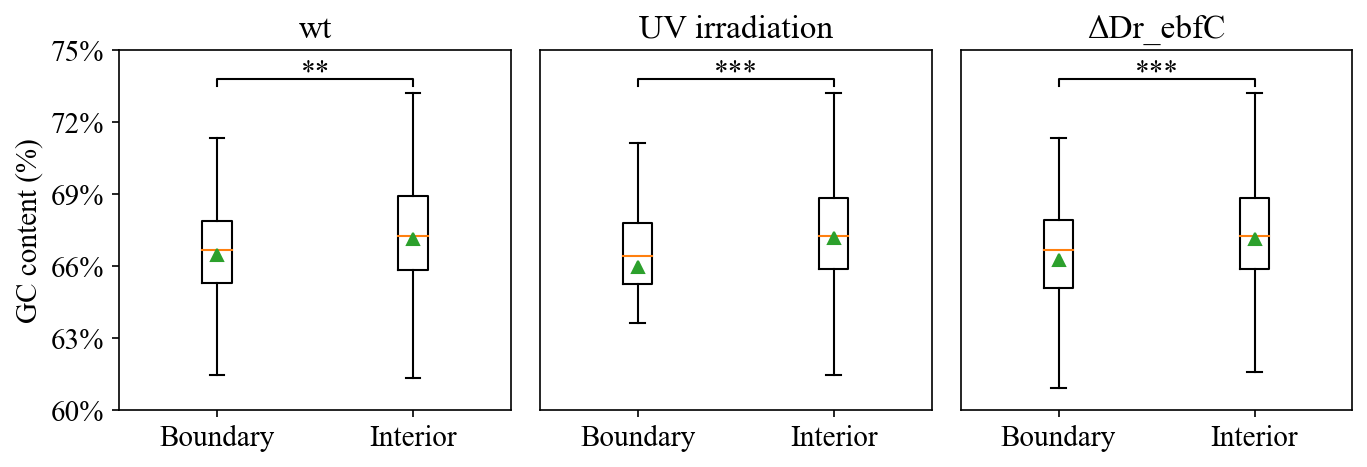

In [16]:
from matplotlib import ticker
fig = plt.figure(figsize=(9, 3), dpi=150, constrained_layout=True)
plt.rc('font',family='Times New Roman') 
matplotlib.rcParams.update({'font.size': 14})

gs = gridspec.GridSpec(1, 3, figure=fig)
ax0 = plt.subplot(gs[0])
ax0.boxplot([wt_CID_Boundary_GC_content, wt_CID_Interior_GC_content],showmeans=True,showfliers=False)
ax0.set_ylim([0.6, 0.75])
plt.yticks([0.6,0.63,0.66,0.69,0.72,0.75])
ax0.set_xticklabels(['Boundary', 'Interior'])
ax0.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax0.set_title("wt", fontsize=16)
ax0.set_ylabel("GC content (%)")
ax0.plot([1, 1, 2, 2], [0.735, 0.738, 0.738, 0.735], lw=1, c="k") 
ax0.text(1.5, 0.735, "**", ha='center', va='bottom', color="k")

ax1 = plt.subplot(gs[1],sharey=ax0)
ax1.boxplot([uv_CID_Boundary_GC_content, uv_CID_Interior_GC_content],showmeans=True,showfliers=False)
ax1.set_xticklabels(['Boundary', 'Interior'])
ax1.set_title("UV irradiation", fontsize=16)
ax1.yaxis.set_visible(False)
ax1.plot([1, 1, 2, 2], [0.735, 0.738, 0.738, 0.735], lw=1, c="k") 
ax1.text(1.5, 0.735, "***", ha='center', va='bottom', color="k")

ax2 = plt.subplot(gs[2],sharey=ax0)
ax2.boxplot([dr_CID_Boundary_GC_content, dr_CID_Interior_GC_content],showmeans=True,showfliers=False)
ax2.set_xticklabels(['Boundary', 'Interior'])
ax2.set_title("ΔDr_ebfC", fontsize=16)
ax2.yaxis.set_visible(False)
ax2.plot([1, 1, 2, 2], [0.735, 0.738, 0.738, 0.735], lw=1, c="k") 
ax2.text(1.5, 0.735, "***", ha='center', va='bottom', color="k")

plt.savefig('../pictures/CIDs_GC_content_boxplot.jpg')

## Extract gene names at the CID boundary 

In [22]:
import pandas as pd
import os
import re

gene_tag = pd.read_csv('../data/new_old_gene_tag.txt', sep='\t', header=None, names=['new_tag', 'old_tag'])
gene_tag

,new_tag,old_tag
0,DR_RS00005,DR_0001
1,DR_RS00010,DR_0002
2,DR_RS00015,DR_0003
3,DR_RS00020,DR_0004
4,DR_RS00025,DR_0005
...,...,...
3285,DR_RS17035,DR_RS17035
3286,DR_RS16170,DR_B0142
3287,DR_RS16175,DR_B0143
3288,DR_RS16180,DR_B0144


In [23]:
def _get_attr(attributes, attr_id, ignore=False):
    """
    Helper function for parsing GFF annotations

    Parameters
    ----------
    attributes : str
        Attribute string
    attr_id : str
        Attribute ID
    ignore : bool
        If true, ignore errors if ID is not in attributes (default: False)

    Returns
    -------
    str, optional
        Value of attribute
    """

    try:
        return re.search(attr_id + "=(.*?)(;|$)", attributes).group(1)
    except AttributeError:
        if ignore:
            return None
        else:
            raise ValueError("{} not in attributes: {}".format(attr_id, attributes))

gff_files = [os.path.join('../data/GCF_000008565.1_ASM856v1_genomic.gff')]

for gff in gff_files:
    with open(gff, "r") as f:
        lines = f.readlines()

    # Read GFF
    names = [
        "accession",
        "source",
        "feature",
        "start",
        "end",
        "score",
        "strand",
        "phase",
        "attributes",
        ]
    DF_gff = pd.read_csv(gff, sep="\t", names=names)
    # Filter for CDSs 
    DF_cds = DF_gff[DF_gff['feature']=='CDS']
    # Also filter for genes to get old_locus_tag
    DF_gene = DF_gff[DF_gff.feature == "gene"].reset_index()
    DF_gene["locus_tag"] = DF_gene.attributes.apply(_get_attr, attr_id="locus_tag", ignore=True)
    DF_gene["old_locus_tag"] = DF_gene.attributes.apply(_get_attr, attr_id="old_locus_tag", ignore=True)
    DF_gene = DF_gene[["locus_tag", "old_locus_tag"]]
    DF_gene = DF_gene[DF_gene.locus_tag.notnull()]

    # Sort by start position
    DF_cds = DF_cds.sort_values("start")

    # Extract attribute information
    DF_cds["locus_tag"] = DF_cds.attributes.apply(_get_attr, attr_id="locus_tag")

    DF_cds["gene_name"] = DF_cds.attributes.apply(_get_attr, attr_id="gene", ignore=True)

    DF_cds["gene_product"] = DF_cds.attributes.apply(_get_attr, attr_id="product", ignore=True)

    DF_cds["ncbi_protein"] = DF_cds.attributes.apply(_get_attr, attr_id="protein_id", ignore=True)

    # Merge in old_locus_tag
    DF_annot = pd.merge(DF_cds, DF_gene, how="left", on="locus_tag", sort=False)

DF_annot1 = DF_annot[DF_annot['accession']=='NC_001263.1']
DF_annot1 = DF_annot1.drop_duplicates(subset='locus_tag',keep='first',inplace=False)
DF_annot1 = DF_annot1.reset_index(drop=True)
keep_cols = ['accession','locus_tag','start','end','gene_product']
DF_annot1 = DF_annot1[keep_cols]
DF_annot1 = DF_annot1[DF_annot1['gene_product']!='hypothetical protein']
DF_annot1['bin'] = ((DF_annot1['start']+DF_annot1['end']) / 10000).astype(int)
DF_annot1 = pd.merge(DF_annot1, gene_tag, how='left', left_on='locus_tag', right_on='new_tag')
DF_annot1 = DF_annot1.drop('new_tag',axis=1)
DF_annot1

,accession,locus_tag,start,end,gene_product,bin,old_tag
0,NC_001263.1,DR_RS00005,93.0,1179.0,DNA polymerase III subunit beta,0,DR_0001
1,NC_001263.1,DR_RS00010,1904.0,3304.0,chromosomal replication initiator protein DnaA,0,DR_0002
2,NC_001263.1,DR_RS00015,3556.0,4251.0,DNA damage response protein DdrC,0,DR_0003
3,NC_001263.1,DR_RS00020,4387.0,5430.0,NUDIX domain-containing protein,0,DR_0004
4,NC_001263.1,DR_RS00025,5438.0,6115.0,TrmB family transcriptional regulator,1,DR_0005
...,...,...,...,...,...,...,...
2121,NC_001263.1,DR_RS13555,2642825.0,2643265.0,dihydrofolate reductase,528,DR_2632
2122,NC_001263.1,DR_RS13560,2643262.0,2644083.0,pentapeptide repeat-containing protein,528,DR_2633
2123,NC_001263.1,DR_RS13565,2644270.0,2645499.0,tyrosine--tRNA ligase,528,DR_2634
2124,NC_001263.1,DR_RS13570,2645698.0,2647146.0,pyruvate kinase,529,DR_2635


In [24]:
DF_annot2 = DF_annot[DF_annot['accession']=='NC_001264.1']
DF_annot2 = DF_annot2.drop_duplicates(subset='locus_tag',keep='first',inplace=False)
DF_annot2 = DF_annot2.reset_index(drop=True)
keep_cols = ['accession','locus_tag','start','end','gene_product']
DF_annot2 = DF_annot2[keep_cols]
DF_annot2 = DF_annot2[DF_annot2['gene_product']!='hypothetical protein']
DF_annot2['bin'] = ((DF_annot2['start']+DF_annot2['end']) / 10000).astype(int)
DF_annot2 = pd.merge(DF_annot2, gene_tag, how='left', left_on='locus_tag', right_on='new_tag')
DF_annot2 = DF_annot2.drop('new_tag',axis=1)
DF_annot2

,accession,locus_tag,start,end,gene_product,bin,old_tag
0,NC_001264.1,DR_RS13585,653.0,1435.0,ParA family protein,0,DR_A0001
1,NC_001264.1,DR_RS13590,1432.0,2313.0,ParB/RepB/Spo0J family partition protein,0,DR_A0002
2,NC_001264.1,DR_RS13595,2418.0,3881.0,NAD-dependent succinate-semialdehyde dehydroge...,0,DR_A0003
3,NC_001264.1,DR_RS13600,4024.0,4668.0,NTP transferase domain-containing protein,0,DR_A0004
4,NC_001264.1,DR_RS13605,4719.0,5897.0,glutathione-dependent formaldehyde dehydrogenase,1,DR_A0005
...,...,...,...,...,...,...,...
290,NC_001264.1,DR_RS15430,406320.0,407234.0,SDR family oxidoreductase,81,DR_A0364
291,NC_001264.1,DR_RS15435,407294.0,408195.0,FRG domain-containing protein,81,DR_RS15435
292,NC_001264.1,DR_RS15440,408201.0,409388.0,UDP-galactopyranose mutase,81,DR_A0367
293,NC_001264.1,DR_RS15445,409381.0,410466.0,glycosyltransferase family 1 protein,81,DR_A0368


In [25]:
def CID_region(CID_Boundary, DF_annot, bin_num):
    CID_Boundary_index = []
    for j in range(bin_num):
        for i in CID_Boundary:
            if j in range(i[0], i[1]+1):
                CID_Boundary_index.append(j)
    
    CID_Boundary_gene = []
    DF_annot_list = DF_annot[['bin', 'old_tag']].values.tolist()
    for i in DF_annot_list:
        if i[0] in CID_Boundary_index:
            CID_Boundary_gene.append(i[1])
    return CID_Boundary_gene


def text_save(filename, data):
    file = open(filename,'a')
    for s in data:
        s = s.replace("'",'').replace(',','') + '\n'
        file.write(s)
    file.close()
    print("Save file successfully") 

In [26]:
wt_CID_Boundary_gene = CID_region(CID_Boundary1, DF_annot1, 530)
wt_CID_Boundary_gene_chr2 = CID_region(CID_Boundary_wt_chr2, DF_annot2, 83)
wt_CID_Boundary_gene.extend(wt_CID_Boundary_gene_chr2)
print(len(wt_CID_Boundary_gene))
text_save('../data/result_files/wt_CID_boundary_gene.txt', wt_CID_Boundary_gene)

uv_CID_Boundary_gene = CID_region(CID_Boundary2, DF_annot1, 530)
uv_CID_Boundary_gene_chr2 = CID_region(CID_Boundary_uv_chr2, DF_annot2, 83)
uv_CID_Boundary_gene.extend(uv_CID_Boundary_gene_chr2)
print(len(uv_CID_Boundary_gene))
text_save('../data/result_files/uv_CID_boundary_gene.txt', uv_CID_Boundary_gene)

dr_CID_Boundary_gene = CID_region(CID_Boundary3, DF_annot1, 530)
dr_CID_Boundary_gene_chr2 = CID_region(CID_Boundary_dr_chr2, DF_annot2, 83)
dr_CID_Boundary_gene.extend(dr_CID_Boundary_gene_chr2)
print(len(dr_CID_Boundary_gene))
text_save('../data/result_files/ebfC_CID_boundary_gene.txt', dr_CID_Boundary_gene)

575
Save file successfully
440
Save file successfully
466
Save file successfully
